## Light GBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

#lgmb
import lightgbm as lgbm

In [5]:
training = pd.read_csv('../test/training-person2.csv')
test = pd.read_csv('../test/test-person2.csv')
sumbit = test['person'].to_frame()

In [78]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [79]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [80]:
X.columns

Index(['event', 'ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site', 'brand_categ',
       'top_condition_categ', 'color_model_categ', 'model_brand_views_categ',
       'device_type_categ', 'returning', 'ad campaign hit days',
       'brand listing days', 'checkout days', 'conversion days',
       'generic listing days', 'lead days', 'search engine hit days',
       'searched products days', 'staticpage days', 'viewed product days',
       'visited site days', 'events_cout_last_week',
       'events_mean_frec_last_week', 'top_event_categ',
       'top_searched_model_categ', 'region_categ', 'city_categ',
       'country_categ', 'last_event_days', 'first_event_days'],
      dtype='object')

In [81]:
rdf = lgbm.LGBMClassifier(
        n_estimators=130,
        num_leaves=8,
        colsample_bytree=.7,
        subsample=.6,
        max_depth=3,
        reg_alpha=0.1,
        reg_lambda=0.1,
        min_split_gain=0.01,
        random_state=RANDOM_SEED
    )

In [82]:
# Training
rdf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        importance_type='split', learning_rate=0.1, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.01,
        n_estimators=130, n_jobs=-1, num_leaves=8, objective=None,
        random_state=12, reg_alpha=0.1, reg_lambda=0.1, silent=True,
        subsample=0.6, subsample_for_bin=200000, subsample_freq=0)

In [83]:
# Predict value
ret = rdf.predict_proba(X_test)

In [84]:
y_test_predictd = ret[:, 1]
roc_auc_score(y_test, y_test_predictd)
#0.8691145494532726

0.8620545901351588

In [85]:
rdf.score(X_test, y_test)

/home/bautista/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9459181045583311

In [86]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [87]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

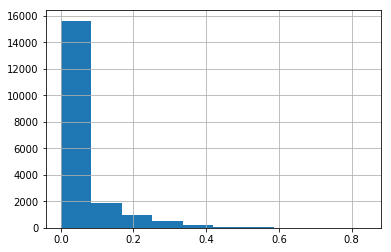

In [88]:
g = (sumbit['label']).hist()

In [89]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: checkout days        Importance: 60
Variable: region_categ         Importance: 55
Variable: top_condition_categ  Importance: 53
Variable: device_type_categ    Importance: 42
Variable: search engine hit days Importance: 37
Variable: color_model_categ    Importance: 36
Variable: city_categ           Importance: 35
Variable: brand_categ          Importance: 31
Variable: top_event_categ      Importance: 30
Variable: conversion days      Importance: 29
Variable: model_brand_views_categ Importance: 28
Variable: country_categ        Importance: 28
Variable: ad campaign hit days Importance: 27
Variable: brand listing days   Importance: 26
Variable: top_searched_model_categ Importance: 23
Variable: event                Importance: 21
Variable: generic listing days Importance: 21
Variable: first_event_days     Importance: 21
Variable: visited site         Importance: 20
Variable: checkout             Importance: 19
Variable: ad campaign hit      Importance: 18
Variable: generic listing

In [90]:
sumbit.to_csv('test/submit-LGBM.csv', index=False)